<center>
    <h1> INF564 Diseño avanzado de algoritmos</h1>
    <h2> Tarea N°3 </h2>
    <h2> 5 de agosto del 2019</h2>
    <h4> Roberto Felipe Fuentes Zenteno - 201173037-2 - roberto.fuentes@alumnos.usm.cl</h4>
</center>

In [115]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import widgets
from ipywidgets import IntSlider

from sklearn.metrics.pairwise import cosine_similarity

## Número de nucleos

In [116]:
!sysctl hw.ncpu

hw.ncpu: 4


## Data

In [117]:
data = 'data/dataset_tarea_3.csv'

data = pd.read_csv(data, header=None, names=['source', 'target', 'rating'])
data.describe()

,source,target,rating
count,24186.000000,24186.000000,24186.000000
mean,864.029314,1051.093815,1.463946
std,1592.085638,1871.765504,2.903656
min,1.000000,1.000000,-10.000000
25%,58.000000,66.000000,1.000000
50%,238.000000,279.000000,1.000000
75%,898.000000,1068.000000,2.000000
max,7604.000000,7604.000000,10.000000


In [118]:
source = np.array(data['source'])
target = np.array(data['target'])
rating = np.array(data['rating'])

data_firstsecond_q = data[data['target'] > (np.max(data['target']) / 2)]

In [119]:
sim_cos_fsq = cosine_similarity(data_firstsecond_q)

In [120]:
sim_cos_alldata = cosine_similarity(data)

In [223]:
def data_plot(data, data_fsq, elev = 20,azim=60):
    fig = plt.figure(figsize=(20,15))
    #3d plot
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.set_xlabel(r'$source$', fontsize = 20)
    ax.set_ylabel(r'$target$', fontsize = 20)
    ax.set_zlabel(r'$rating$', fontsize = 20)
    ax.set_xlim([min(data['source'])-100,max(data['source'])+100])
    ax.set_ylim([min(data['target'])-100,max(data['target'])+100])
    ax.set_zlim([min(data['rating'])-1,max(data['rating'])+1])
    ax.view_init(elev,azim)

    ax.scatter(data['source'], data['target'], data['rating'], c=data['rating'], cmap='viridis', 
               s = 10, alpha = 0.3)
    plt.title("Grafica de la data en 3D")

    #2d plot
    ax = fig.add_subplot(2, 2, 2)
    plt.xlabel(r'$source$', fontsize = 20)
    plt.ylabel(r'$target$', fontsize = 20)
    plt.xlim([min(data['source'])-100,max(data['source'])+100])
    plt.ylim([min(data['target'])-100,max(data['target'])+100])
    plt.grid()

    plt.scatter(data['source'], data['target'], c=data['rating'], 
               s = data['rating']*20, alpha = 0.3, zorder = 1)
    plt.colorbar(ticks=[-10,0,10])
    plt.title("Grafica de la data en 2D")
    
    #################################################
    #3d plot
    ax = fig.add_subplot(2, 2, 3, projection='3d')
    ax.set_xlabel(r'$source$', fontsize = 20)
    ax.set_ylabel(r'$target$', fontsize = 20)
    ax.set_zlabel(r'$rating$', fontsize = 20)
    ax.set_xlim([min(data_fsq['source'])-100,max(data_fsq['source'])+100])
    ax.set_ylim([min(data_fsq['target'])-100,max(data_fsq['target'])+100])
    ax.set_zlim([min(data_fsq['rating'])-1,max(data_fsq['rating'])+1])
    ax.view_init(elev,azim)

    ax.scatter(data_fsq['source'], data_fsq['target'], data_fsq['rating'], c=data_fsq['rating'], cmap='viridis', 
               s = 10, alpha = 0.3)
    plt.title("Grafica de la data modificada en 3D")

    #2d plot
    ax = fig.add_subplot(2, 2, 4)
    plt.xlabel(r'$source$', fontsize = 20)
    plt.ylabel(r'$target$', fontsize = 20)
    plt.xlim([min(data_fsq['source'])-100,max(data_fsq['source'])+100])
    plt.ylim([min(data_fsq['target'])-100,max(data_fsq['target'])+100])
    plt.grid()

    plt.scatter(data_fsq['source'], data_fsq['target'], c=data_fsq['rating'], 
               s = data_fsq['rating']*20, alpha = 0.3, zorder = 1)
    plt.colorbar(ticks=[-10,0,10])
    plt.title("Grafica de la data modificada en 2D")
    
    plt.show()

In [224]:
elev_widget = IntSlider(min=0,max=180,step=10,value=20)
azim_widget = IntSlider(min=0,max=360,step=10,value=60)
widgets.interact(data_plot,
         data = widgets.fixed(data),
         data_fsq = widgets.fixed(data_firstsecond_q),
         elev=elev_widget,azim=azim_widget)

<function __main__.data_plot>

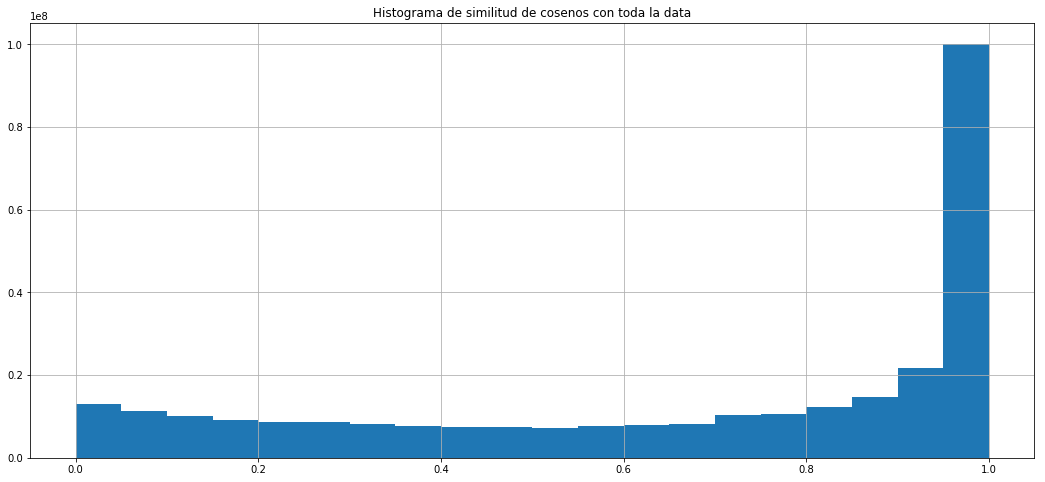

In [123]:
fig = plt.figure(figsize=(18,8))
data_upper = np.triu(sim_cos_alldata, k=1) # Get upper triadiagonal without diagonal
data_flatten = data_upper.flatten() # Vectorize matrix
data_flatten = data_flatten[data_flatten>0] # Remove 0
plt.hist(data_flatten, bins=20)
plt.grid(True)
plt.title("Histograma de similitud de cosenos con toda la data")
plt.show()

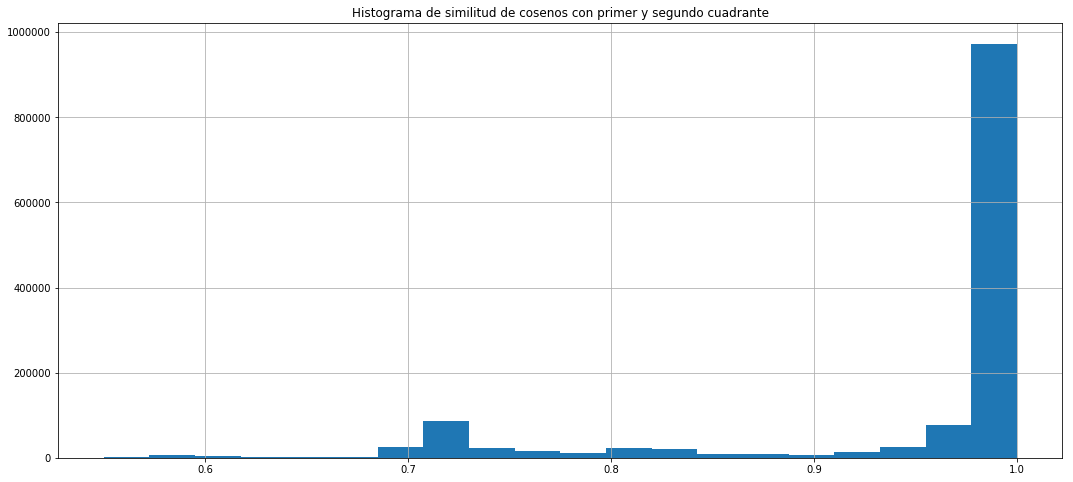

In [124]:
fig = plt.figure(figsize=(18,8))
data_upper = np.triu(sim_cos_fsq, k=1) # Get upper triadiagonal without diagonal
data_flatten = data_upper.flatten() # Vectorize matrix
data_flatten = data_flatten[data_flatten>0] # Remove 0
plt.hist(data_flatten, bins=20)
plt.grid(True)
plt.title("Histograma de similitud de cosenos con primer y segundo cuadrante")
plt.show()

In [125]:
K = list(range(10, 51, 10))

In [126]:
iterations = []
centroids = []

for k in K:
    !bash run.sh $k $.1 2>/dev/null > temp.txt
    f = open("temp.txt", "r")
    first = True
    aux = []
    for i in f:
        if(first):
            iterations.append(int(i))
            first = False
        else:
            c = i.split("(")[1].split(")")[0].split(",")
            c = [float(c[j]) for j in range(len(c))]
            aux.append(c)
    aux = np.array(aux)
    centroids.append(aux)
iterations = np.array(iterations)
centroids = np.array(centroids)

## Grafica de centroides y puntos

In [127]:
def data_centroids_plot(source, target, rating, iterations, centroids, K, k , elev = 20,azim=60):
    fig = plt.figure(figsize=(20,8))
    #3d plot

    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlabel(r'$source$', fontsize = 20)
    ax.set_ylabel(r'$target$', fontsize = 20)
    ax.set_zlabel(r'$rating$', fontsize = 20)
    ax.set_xlim([min(source)-100,max(source)+100])
    ax.set_ylim([min(target)-100,max(target)+100])
    ax.set_zlim([min(rating)-1,max(rating)+1])
    ax.view_init(elev,azim)

    ax.scatter(source, target, rating, c=rating, cmap='viridis', s = 10, alpha = 0.3)
    plt.title(str(K[k]) + "3d")
    ax.scatter(centroids[k][:,0], centroids[k][:,1], centroids[k][:,2], c='r', marker='*', s=1000, 
               label = 'centroides')
    ax.legend(loc='best',scatterpoints=1, frameon=False, labelspacing=2)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.tick_params(axis='y', which='major', labelsize=20)
    #2d plot
    ax = fig.add_subplot(1, 2, 2)
    ax.set_xlabel(r'$source$', fontsize = 20)
    ax.set_ylabel(r'$target$', fontsize = 20)
    ax.set_xlim([min(source)-100,max(source)+100])
    ax.set_ylim([min(target)-100,max(target)+100])
    ax.grid()

    ax.scatter(source, target, c=rating, cmap='viridis', s = 10, alpha = 0.3, zorder = 1)
    ax.scatter(centroids[k][:,0], centroids[k][:,1], c='r', marker='*', s = 500, zorder = 2, label = 'centroides')
    plt.title(str(K[k]) + "2d")
    ax.legend(loc='best')
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.tick_params(axis='y', which='major', labelsize=20)
    
    plt.show()

In [128]:
elev_widget = IntSlider(min=0,max=180,step=10,value=20)
azim_widget = IntSlider(min=0,max=360,step=10,value=60)
k_widget = IntSlider(min=0,max=len(K)-1,step=1,value=0)
widgets.interact(data_centroids_plot,
         source = widgets.fixed(source),
         target = widgets.fixed(target),
         rating = widgets.fixed(rating),
         iterations = widgets.fixed(iterations),
         centroids = widgets.fixed(centroids),
         K = widgets.fixed(K),
         k = k_widget,
         elev=elev_widget,azim=azim_widget)

<function __main__.data_centroids_plot>

## Boxplots

In [160]:
times = []
iterations = []
centroids = []
for k in K:
    print("Numero de centroides: ", k)
    centroids_aux = []
    iterations_aux = []
    times_aux = []
    for i in range(5):
        time = %timeit -r 1 -n 1 -o -q !bash run.sh $k $.1 2>/dev/null > temp.txt
        times_aux.append(time)
        f = open("temp.txt", "r")
        first = True
        aux = []
        for j in f:
            if(first):
                iterations_aux.append(int(j))
                first = False
            else:
                c = j.split("(")[1].split(")")[0].split(",")
                c = [float(c[k]) for k in range(len(c))]
                aux.append(c)
        aux = np.array(aux)
        centroids_aux.append(aux)
    iterations.append(iterations_aux)
    times.append(times_aux)
    centroids.append(centroids_aux)
times = np.array(times)
iterations = np.array(iterations)
centroids = np.array(centroids)

Numero de centroides:  10
Numero de centroides:  20
Numero de centroides:  30
Numero de centroides:  40
Numero de centroides:  50


In [181]:
for i in range(len(times)):
    for j in range(5):
        times[i,j] = times[i,j].all_runs[0]

In [211]:
def boxplot_times(times):
    N = len(times)
    fig, ax = plt.subplots(1, N, figsize=(20, 8), sharey=True)
    for k in range(N):
        t = list(times[k])
        ax[k].boxplot(t)
        ax[k].set_title("K = " + str((k+1)*10), fontsize = 20)
        ax[k].grid(True)
        ax[k].tick_params(axis='x', which='major', labelsize=20)
        ax[k].tick_params(axis='y', which='major', labelsize=20)
    plt.tight_layout()
    plt.suptitle("Boxplots de tiempo para distintos centroides K", fontsize = 20)
    plt.subplots_adjust(top=0.85)
    plt.show()

In [218]:
def boxplot_iterations(iterations):
    N = len(iterations)
    fig, ax = plt.subplots(1, N, figsize=(20, 8), sharey=True)
    for k in range(N):
        t = iterations[k]
        ax[k].boxplot(t)
        ax[k].set_title("K = " + str((k+1)*10), fontsize = 20)
        ax[k].grid(True)
        ax[k].tick_params(axis='x', which='major', labelsize=20)
        ax[k].tick_params(axis='y', which='major', labelsize=20)
    plt.tight_layout()
    plt.suptitle("Boxplots de iteraciones para distintos centroides K", fontsize = 20)
    plt.subplots_adjust(top=0.85)
    plt.show()

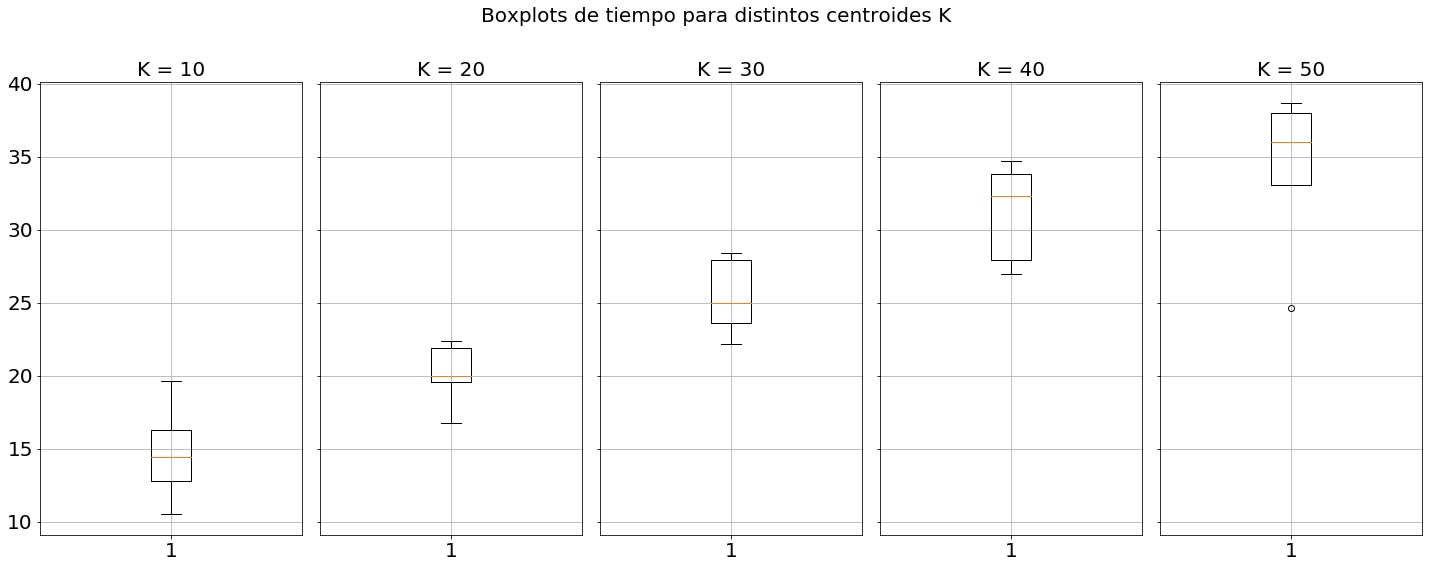

In [219]:
boxplot_times(times)

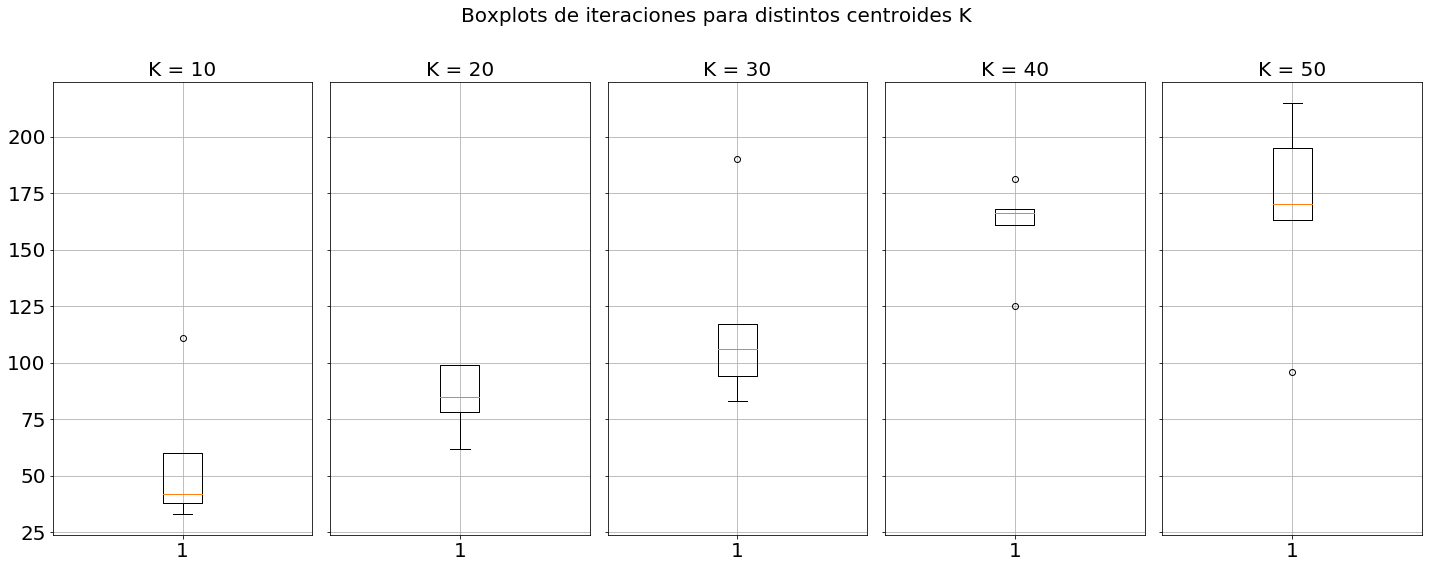

In [220]:
boxplot_iterations(iterations)